In [2]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
from bs4 import BeautifulSoup as bs
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time
from tqdm import tqdm_notebook as tqdm
import requests as req

In [35]:
driver = webdriver.Chrome(ChromeDriverManager().install())
#driver.get('https://www.amazon.com/Nespresso-VertuoPlus-Espresso-DeLonghi-Aeroccino/dp/B01MTZ419O/ref=sr_1_2?crid=2SMG4SVV7J820&keywords=Nespresso+VertuoPlus+Coffee+and+Espresso+Machine+by+De%27Longhi+with+Milk+Frother%2C+Grey&qid=1664185758&qu=eyJxc2MiOiIwLjAwIiwicXNhIjoiMC4wMCIsInFzcCI6IjAuMDAifQ%3D%3D&sprefix=nespresso+vertuoplus+coffee+and+espresso+machine+by+de%27longhi+with+milk+frother%2C+grey%2Caps%2C232&sr=8-2')
driver.get('https://www.amazon.com/Nespresso-VertuoPlus-Espresso-DeLonghi-Aeroccino/product-reviews/B01N1QSB6J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&language=ko_KR')
time.sleep(1)

In [36]:
name_list = []
score_list = []
date_list = []
style_list = []
review_list = []

while True:
    try:
        star = bs(driver.page_source, "html.parser")
        score = star.find_all("i",{'data-hook':"review-star-rating"})
        date = driver.find_elements_by_css_selector('span.a-size-base.a-color-secondary.review-date')
        style = driver.find_elements_by_css_selector('a.a-size-mini.a-link-normal.a-color-secondary')
        review = driver.find_elements_by_css_selector("div.a-row.a-spacing-small.review-data")
        #time.sleep(1)
        for i in score:
            score_list.append(i.text)
        for i in date:
            date_list.append(i.text)
        for i in style:
            style_list.append(i.text)
        for i in review:
            review_list.append(i.text)
        #time.sleep(1)
        btn = driver.find_element_by_css_selector('#cm_cr-pagination_bar > ul > li.a-last')
        btn.click()
        time.sleep(2)
    except:
        break

In [37]:
len(score_list),len(date_list),len(style_list),len(review_list)

(2090, 2652, 2208, 2208)

In [38]:
Coffee1 = {'Star': score_list}

In [39]:
Coffee2 = {'Date': date_list}

In [42]:
Coffee3 = {'Style': style_list, 'Review': review_list}

In [43]:
coffee1 = pd.DataFrame(Coffee1)
coffee2 = pd.DataFrame(Coffee2)
coffee3 = pd.DataFrame(Coffee3)

In [44]:
coffee = pd.concat([coffee1, coffee2, coffee3],axis=1)
coffee.to_csv('coffee.csv')

In [45]:
date = pd.read_csv('coffee.csv',encoding='utf-8')
cafe = date.head(2090)

In [46]:
cafe.to_csv('homecafe.csv')

In [47]:
homecafe = pd.read_csv('homecafe.csv', encoding='utf-8')
homecafe

,Unnamed: 0.1,Unnamed: 0,Star,Date,Style,Review
0,0,0,별 5개 중 5.0,Reviewed in the United States 🇺🇸 on 2017년 12월 15일,스타일: 머신 + 에어로색상: 그레이,"""Is this a good coffee maker?"" Well, that's go..."
1,1,1,별 5개 중 5.0,Reviewed in the United States 🇺🇸 on 2018년 11월 28일,스타일: 기계 전용색상: 블랙,We have used this machine daily since purchase...
2,2,2,별 5개 중 5.0,Reviewed in the United States 🇺🇸 on 2018년 12월 10일,스타일: 기계 전용색상: 그레이,The inside box that the machine came in had be...
3,3,3,별 5개 중 5.0,Reviewed in the United States 🇺🇸 on 2022년 9월 15일,스타일: 머신 + 에어로색상: 타이탄.,I’m loving this machine! I’ve had many differe...
4,4,4,별 5개 중 5.0,Reviewed in the United States 🇺🇸 on 2022년 9월 24일,스타일: 기계 전용색상: 블랙,This is the best purchase! My fiancé and I use...
...,...,...,...,...,...,...
2085,2085,2085,별 5개 중 5.0,Reviewed in the United States 🇺🇸 on 2018년 1월 14일,스타일: 기계 전용색상: 그레이,SO MUCH FLAVOR.
2086,2086,2086,별 5개 중 4.0,Reviewed in the United States 🇺🇸 on 2021년 12월 28일,스타일: 머신 + 에어로색상: 그레이,I've only had my Nespresso machine for a short...
2087,2087,2087,별 5개 중 5.0,Reviewed in the United States 🇺🇸 on 2017년 12월 11일,스타일: 기계 전용색상: 레드,Nice and elegant
2088,2088,2088,별 5개 중 5.0,Reviewed in the United States 🇺🇸 on 2017년 12월 15일,스타일: 기계 전용색상: 블랙,This machine has changed the way I do mornings...


In [49]:
homecafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  2090 non-null   int64 
 1   Unnamed: 0    2090 non-null   int64 
 2   Star          2090 non-null   object
 3   Date          2090 non-null   object
 4   Style         2090 non-null   object
 5   Review        2083 non-null   object
dtypes: int64(2), object(4)
memory usage: 98.1+ KB


In [50]:
import nltk
from nltk import pos_tag
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import pickle
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\82104\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\82104\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\82104\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
review_list[0]

'"Is this a good coffee maker?" Well, that\'s going to depend upon your expectations in coffee.\n\nIf you\'re looking for a "pod coffee maker" that makes normal drip coffee (think Keurig) then Nespresso is somewhat different, and may or may not meet your expectations.\n\nI also have a Keurig. It\'s just fine for brewing basic, cheap coffee (or more expensive if you buy major-brand-name capsules). I like my Keurig--we\'ve had it for over 5 years, and it works great. But, those who are environmentally conscious will soon realize that Keurig is not recyclable at all, and countless billions of pods a year are making their way into landfills.\n\nNespresso\'s pods are made of 100% recycled/recyclable aluminum. Nespresso is VERY focused on a goal of 100% recycle-ability, and provides recycling bags with fully pre-paid shipping. Fill the bag (holds about 75-100 capsules), seal it, and drop it off at your nearest UPS store (or Nespresso store/kiosk if you happen to have one in a mall nearby). N

In [53]:
review_list_nltk = ''
for i in review_list:
    review_list_nltk = review_list_nltk + i

In [54]:
review_list_nltk

'"Is this a good coffee maker?" Well, that\'s going to depend upon your expectations in coffee.\n\nIf you\'re looking for a "pod coffee maker" that makes normal drip coffee (think Keurig) then Nespresso is somewhat different, and may or may not meet your expectations.\n\nI also have a Keurig. It\'s just fine for brewing basic, cheap coffee (or more expensive if you buy major-brand-name capsules). I like my Keurig--we\'ve had it for over 5 years, and it works great. But, those who are environmentally conscious will soon realize that Keurig is not recyclable at all, and countless billions of pods a year are making their way into landfills.\n\nNespresso\'s pods are made of 100% recycled/recyclable aluminum. Nespresso is VERY focused on a goal of 100% recycle-ability, and provides recycling bags with fully pre-paid shipping. Fill the bag (holds about 75-100 capsules), seal it, and drop it off at your nearest UPS store (or Nespresso store/kiosk if you happen to have one in a mall nearby). N

In [55]:
nltk.corpus.stopwords.words('english')
stopwords = nltk.corpus.stopwords.words('english')

In [78]:
stopwords = ['i', 'be','see','lol.i','see','beans.i',
            'have','want','joe','look','bit','continue','winner.this',
            '”','t','bulletproof','say','“','do','me.i','coffee','try','use',
            '%','way','maker','cup','water','get','love','keurig','work',
            'day','amazon','box','year','pod','return','thing']

In [79]:
def extract_tags_english(string):
    word_list = []
    string = string.lower()
    string = nltk.word_tokenize(string)
    string = nltk.pos_tag(string)
       
    for word, tag in string:
        if tag in ['NN', 'VB']:
            if word not in stopwords: #if word not in stopwords:
                word_list.append(word)

    return word_list

In [80]:
review_list_nltk_update = extract_tags_english(review_list_nltk)
review_list_nltk_update

['depend',
 'think',
 'meet',
 'realize',
 'nespresso',
 'aluminum',
 'nespresso',
 'goal',
 'recycle-ability',
 'shipping',
 'fill',
 'bag',
 'seal',
 'drop',
 'store',
 'mall',
 'dismantle',
 'process',
 'compost',
 'recycle',
 'cost',
 'waste',
 'consumer',
 'job',
 'describe',
 'experience',
 'espresso',
 'foo',
 'machine',
 'line',
 'anything',
 'find',
 'nespresso',
 'snooty',
 'nespresso',
 'product',
 'espresso',
 'rpm',
 'centrifusion',
 'word',
 'commingle',
 'force',
 'infusion',
 'pump',
 'spinning',
 'kitchen',
 'appliance',
 'hear',
 'spinning',
 'regardless',
 'layer',
 'crema',
 'foam',
 'moment',
 'espresso',
 'oz',
 'product',
 'line',
 'vertuo',
 'crema',
 'layer',
 'number',
 'bold',
 'smoky',
 'master',
 'type',
 'button',
 'milk',
 'frother',
 'add-on',
 'purchase',
 'gimmick',
 'experience',
 'chain',
 'name',
 'spend',
 'cost',
 'espresso',
 'shop',
 'latte',
 'recycling',
 'drop',
 'bag',
 'seal',
 'drop',
 'store',
 'shipping',
 'cost',
 'milk',
 'frother',
 '

In [81]:
count = Counter(review_list_nltk_update)
count

Counter({'depend': 1,
         'think': 21,
         'meet': 2,
         'realize': 10,
         'nespresso': 349,
         'aluminum': 9,
         'goal': 2,
         'recycle-ability': 1,
         'shipping': 25,
         'fill': 29,
         'bag': 18,
         'seal': 9,
         'drop': 22,
         'store': 50,
         'mall': 1,
         'dismantle': 1,
         'process': 46,
         'compost': 1,
         'recycle': 21,
         'cost': 67,
         'waste': 32,
         'consumer': 6,
         'job': 17,
         'describe': 1,
         'experience': 49,
         'espresso': 304,
         'foo': 1,
         'machine': 1606,
         'line': 51,
         'anything': 52,
         'find': 67,
         'snooty': 1,
         'product': 210,
         'rpm': 3,
         'centrifusion': 2,
         'word': 3,
         'commingle': 1,
         'force': 9,
         'infusion': 3,
         'pump': 7,
         'spinning': 4,
         'kitchen': 29,
         'appliance': 7,
         'he

In [110]:
count.most_common(10)

[('machine', 1606),
 ('nespresso', 349),
 ('espresso', 304),
 ('milk', 270),
 ('time', 256),
 ('make', 213),
 ('product', 210),
 ('buy', 194),
 ('frother', 178),
 ('quality', 145)]

In [83]:
from PIL import Image
import numpy as np

In [88]:
mask_image = np.array(Image.open(r"C:\Users\82104\Desktop\image\커피잔.jpg"))
mask_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [108]:
wordcloud = WordCloud(font_path='C:\Windows\Fonts\gulim.ttc',
                     width = 700,height=700
                      ,background_color='white',colormap = 'spring'
                      ,mask = mask_image
                      ,random_state=1).generate_from_frequencies(count)

<function matplotlib.pyplot.show(close=None, block=None)>

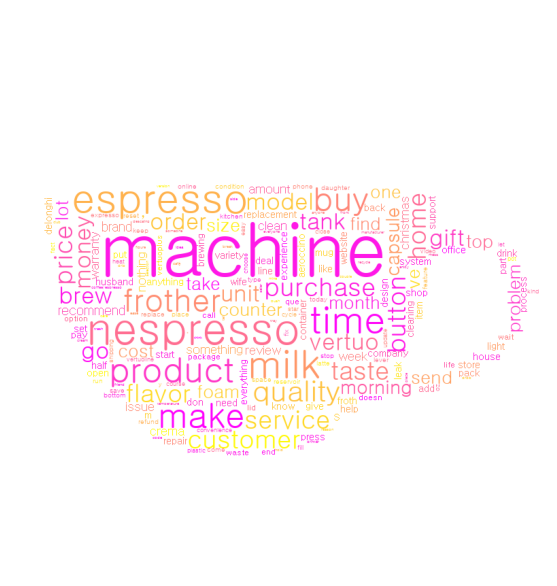

In [109]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title(" ", size = 30)
plt.show